In [1]:
from CR3BP import CR3BP
import numpy as np

prop = CR3BP(odemethod="LSODA")
x0 = np.array(
    [
        8.173732823e-1,
        0,
        0,
        0,
        1.914652985644e-1,
        0,
    ]
)
tf = 2.81934851464

In [2]:
optstate = prop.find_periodic_orbit(
    opt_vars=["tf", "x"], obj_zero=["y", "vx"], init_guess=[tf, *x0], tol=1e-11
)

In [3]:
x0 = optstate[1:]
tf = optstate[0]

In [4]:
xs = prop.propagate(x0, 3 * tf, tol=3e-16)

In [14]:
xs_s1, xs_s2, xs_u1, xs_u2 = prop.manifold_curves(x0, tf, 25, d=1e-3, tprop=3, tol=1e-10)

In [6]:
# xs_s1, xs_s2, xs_u1, xs_u2 = prop.manifold_points(x0, tf, 25, tol=1e-12)

(np.float64(-0.5828309907238114),
 np.float64(1.0943022270521774),
 np.float64(-0.8385666028166516),
 np.float64(0.8385666149593372),
 np.float64(-0.6231063005387228),
 np.float64(0.6347436127932687))

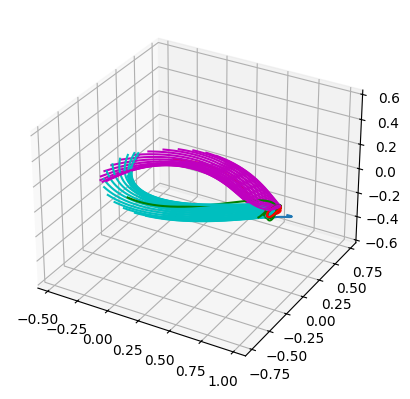

In [15]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection="3d")
x, y, z, vx, vy, vz = xs.T
plt.plot(x, y, z)
for i in range(25):
    plt.plot(xs_s1[i][:, 0], xs_s1[i][:, 1], xs_s1[i][:, 2], "-c")
    plt.plot(xs_s2[i][:, 0], xs_s2[i][:, 1], xs_s2[i][:, 2], "-g")
    plt.plot(xs_u1[i][:, 0], xs_u1[i][:, 1], xs_u1[i][:, 2], "-r")
    plt.plot(xs_u2[i][:, 0], xs_u2[i][:, 1], xs_u2[i][:, 2], "-m")
plt.axis("equal")

In [8]:
np.shape(xs_s1)

(25, 1000, 6)